In [2]:
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import kendalltau
from scipy.stats import spearmanr
from scipy import stats
from sklearn.decomposition import PCA
import seaborn as sns
import random
import sys
import copy
from igraph import *
import time
import numpy as np
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [3]:
g = Graph.Read_Ncol("moreno_health", directed = True)
with open('redes e centralidades/centralidades-moreno_health-picke.txt', 'rb') as f:
    centralidade_list = pickle.load(f)

In [4]:
for i in centralidade_list:
    
    print sorted(i,reverse=True)[:10],'\n'

[0.014184397163120569, 0.013790386130811664, 0.013396375098502758, 0.013396375098502758, 0.013002364066193855, 0.01260835303388495, 0.01260835303388495, 0.01260835303388495, 0.012214342001576044, 0.011820330969267141] 

[0.022701532720147504, 0.02193561715583261, 0.017739126125853797, 0.015628498428749228, 0.015494157184433192, 0.014727541411486906, 0.01363777876205463, 0.013105175185809264, 0.012983086514920096, 0.012910265923753944] 

[0.0032185334701279817, 0.002608238930628355, 0.002431966599055986, 0.002424956930163909, 0.0024011012622492394, 0.0023485219778107314, 0.0022948100925847333, 0.0022127849207977533, 0.002205797978060425, 0.0020935807075559173] 

[0.2153212240554896, 0.21361461219215735, 0.2127823190245882, 0.21184830108685265, 0.20873727192182745, 0.20827639075138585, 0.20802585780340904, 0.20771353792881678, 0.20669979655844706, 0.2064325034762567] 

[0.3889630634156288, 0.38301947935168645, 0.3483431147912988, 0.30613595343816724, 0.2633466340529374, 0.263010405219333

In [4]:
len(centralidade_list)

7

In [5]:
X = np.array(centralidade_list)
X = X.transpose()
# X[5] = stats.zscore(X[5])

# problemas de escala

X = stats.zscore(X)
X.shape

(2539, 7)

In [6]:
varience_values = []

pca = PCA(n_components=1,svd_solver='full')
teste = pca.fit_transform(X)
explained_varience = pca.explained_variance_ratio_.sum()
print(float(pca.explained_variance_ratio_.sum()*100))
print(pca.explained_variance_ratio_,len(pca.explained_variance_ratio_))
print(pca.singular_values_,len(pca.singular_values_))  

57.2118944236
(array([0.57211894]), 1)
(array([100.8378401]), 1)


In [7]:
lista_teste = teste.tolist()
len(lista_teste)
#  a partir daqui é so pegar os index igual no que ja tem
pca_values = []
for sublist in lista_teste:
    for item in sublist:
        pca_values.append(item)
        
len(pca_values)
# print(flat_list[:50])

2539

In [8]:
labels_medidas = ['0_grau','1_betweennes','2_pagerank','3_closeness','4_eigenvector_centrality','5_harmonic_centrality','6_load_centrality']
labels_medidas

['0_grau',
 '1_betweennes',
 '2_pagerank',
 '3_closeness',
 '4_eigenvector_centrality',
 '5_harmonic_centrality',
 '6_load_centrality']

In [9]:
#  A partir daqui analise de correlacao entre as medidas

In [10]:
def calcula_PCA(matrix,col1,col2): # pca entre duas colunas
    vindex = [i for i in range(g.vcount())]
    
    Y = np.array([matrix[:,col1],matrix[:,col2]])
    Y = Y.transpose()
#     print (Y.shape)
#     print (Y,type(Y),type(Y[0]),len(Y[0]))
    
    pca = PCA(n_components=1,svd_solver='full')
    teste = pca.fit_transform(Y)
    explained_varience = pca.explained_variance_ratio_.sum()
    print(float(pca.explained_variance_ratio_.sum()*100))
    lista_teste = teste.tolist()
    flat_list = []
    for sublist in lista_teste:
        for item in sublist:
            flat_list.append(item)
    aflat, seeds_PCA = (list(x) for x in zip(*sorted(zip(flat_list, vindex), reverse=True)))
    return (seeds_PCA,np.array(flat_list))

In [11]:
def calcKendall(matrix):
    matrix_kendall = []
    for i in range(matrix.shape[1]):
        kend = []
        for j in range(matrix.shape[1]):
            tau, p_value = kendalltau(matrix[:,i],matrix[:,j])
            kend.append(tau)
        matrix_kendall.append(kend)
    matrix_kendall = np.array(matrix_kendall)
    return(matrix_kendall)

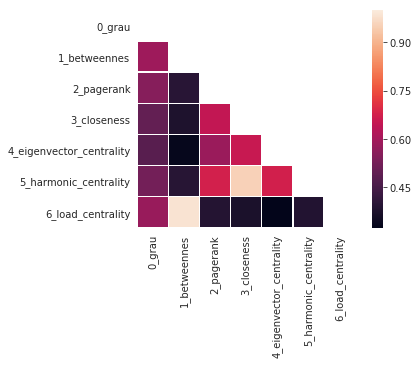

In [12]:
corr = calcKendall(X)
# sns.heatmap(,xticklabels=labels,yticklabels=labels,linewidths=.5)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask,square=True,xticklabels=labels_medidas,yticklabels=labels_medidas,linewidths=.5)

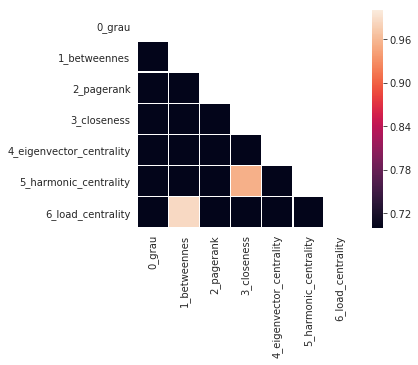

In [13]:
corr = calcKendall(X)
# sns.heatmap(,xticklabels=labels,yticklabels=labels,linewidths=.5)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, vmin=.7,mask=mask,square=True,xticklabels=labels_medidas,yticklabels=labels_medidas,linewidths=.5)

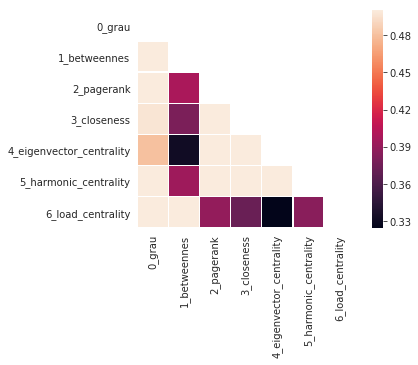

In [14]:
corr = calcKendall(X)
# sns.heatmap(,xticklabels=labels,yticklabels=labels,linewidths=.5)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, vmax = .5,mask=mask,square=True,xticklabels=labels_medidas,yticklabels=labels_medidas,linewidths=.5)

In [15]:
a = np.array(pca_values)
a = a.reshape(len(a),1)
X = np.append(X,a,axis=1)
X.shape

(2539, 8)

In [16]:
matrix_teste = X

In [17]:
# Alta correlacao moreno_highschool

c_1_6 = calcula_PCA(matrix_teste,1,6)
c_3_5 = calcula_PCA(matrix_teste,3,5)


99.9706689523
99.9221289331


In [18]:
# Baixa correlacao moreno_highschool
c_1_2 = calcula_PCA(matrix_teste,1,2)
c_1_3 = calcula_PCA(matrix_teste,1,3)
c_1_4 = calcula_PCA(matrix_teste,1,4)
c_1_5 = calcula_PCA(matrix_teste,1,5)

c_6_2 = calcula_PCA(matrix_teste,6,2)
c_6_3 = calcula_PCA(matrix_teste,6,3)
c_6_4 = calcula_PCA(matrix_teste,6,4)
c_6_5 = calcula_PCA(matrix_teste,6,5)


71.4212394571
70.585649856
52.5906918825
71.4944717009
70.5666174039
70.3455004991
52.200385382
71.2207816954


In [19]:
#  adicionando na matrix temporaria moreno_highschool
matrix_teste = np.hstack((matrix_teste, np.array([c_1_6[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_3_5[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_1_2[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_1_3[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_1_4[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_1_5[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_6_2[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_6_3[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_6_4[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_6_5[1]]).transpose()))
matrix_teste.shape



(2539, 18)

In [20]:
# olhando correlacao das novas medidas da matrix teste

In [21]:
# moreno_highschool
labels = ['0_grau','1_betweennes','2_pagerank','3_closeness','4_eigenvector_centrality','5_harmonic_centrality','6_load_centrality','7_PCA_all','16','35','12','13','14','15','62','63','64','65']



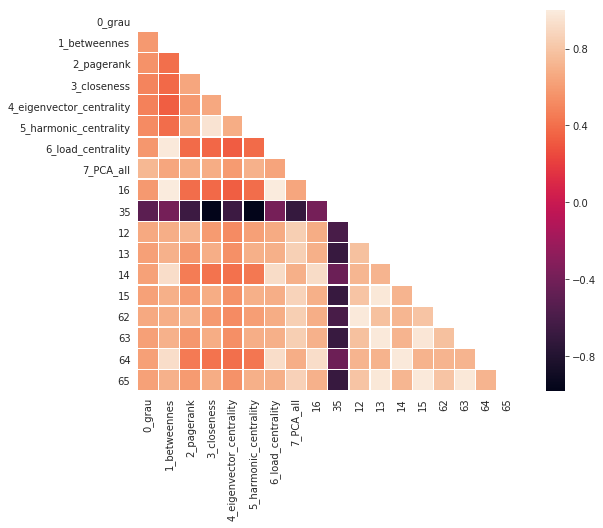

In [22]:
# 
a = plt.figure(figsize=(10,7))
corr = calcKendall(matrix_teste)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask,square=True,xticklabels=labels,yticklabels=labels,linewidths=.5)

In [23]:
import pandas as pd


In [24]:
vindex = [i for i in range(g.vcount())]

my_list = X
### my_list[0] = grau
### my_list[1] = betweenness
### my_list[2] = pagerank
### my_list[3] = closeness
### my_list[4] = eigenvector_centrality
### my_list[5] = harmonic_centrality
### my_list[6] = load_centrality 
### my_list[7] = PCA_all
### ...etc
aflat, seeds_grau = (list(x) for x in zip(*sorted(zip(my_list[:,0], vindex), reverse=True)))
aflat, seeds_betweennes = (list(x) for x in zip(*sorted(zip(my_list[:,1], vindex), reverse=True)))
aflat, seeds_pagerank = (list(x) for x in zip(*sorted(zip(my_list[:,2], vindex), reverse=True)))
aflat, seeds_closeness = (list(x) for x in zip(*sorted(zip(my_list[:,3], vindex), reverse=True)))
aflat, seeds_eigenvector_centrality = (list(x) for x in zip(*sorted(zip(my_list[:,4], vindex), reverse=True)))
aflat, seeds_harmonic_centrality = (list(x) for x in zip(*sorted(zip(my_list[:,5], vindex), reverse=True)))
aflat, seeds_load_centrality = (list(x) for x in zip(*sorted(zip(my_list[:,6], vindex), reverse=True)))
aflat, seeds_PCA = (list(x) for x in zip(*sorted(zip(pca_values, vindex), reverse=True)))


In [25]:
d = {'0_grau' : seeds_grau[:100],'1_betweennes':seeds_betweennes[:100],
     '2_pagerank' :seeds_pagerank[:100],'3_closeness':seeds_closeness[:100],
     '4_eigenvector_centrality':seeds_eigenvector_centrality[:100],'5_harmonic_centrality':seeds_harmonic_centrality[:100],
     '6_load_centrality':seeds_load_centrality[:100],'7_PCA_all':seeds_PCA[:100],
     'm_1_6':c_1_6[0][:100],'m_35':c_3_5[0][:100],
     'm_12':c_1_2[0][:100],
     'm_13':c_1_3[0][:100],
     'm_14':c_1_4[0][:100],'m_15':c_1_5[0][:100],
     'm_62':c_1_2[0][:100],
     'm_63':c_1_3[0][:100],
     'm_64':c_1_4[0][:100],'m_65':c_1_5[0][:100]}

In [26]:
df = pd.DataFrame(data=d)
df.head()

,0_grau,1_betweennes,2_pagerank,3_closeness,4_eigenvector_centrality,5_harmonic_centrality,6_load_centrality,7_PCA_all,m_12,m_13,m_14,m_15,m_1_6,m_35,m_62,m_63,m_64,m_65
0,2055,101,835,835,2055,835,572,101,101,101,2055,101,101,2538,101,101,2055,101
1,835,572,931,147,2040,604,101,572,835,572,2040,572,572,2537,835,572,2040,572
2,2038,714,2055,604,2038,147,714,714,572,714,2038,714,714,2536,572,714,2038,714
3,790,794,2038,931,2151,931,1043,835,66,794,2151,794,1043,2534,66,794,2151,794
4,604,1043,2040,621,2106,790,794,1936,714,1043,2106,1043,794,2533,714,1043,2106,1043


In [27]:
s = [seeds_grau[:50],seeds_betweennes[:50],
    seeds_pagerank[:50],seeds_closeness[:50],
    seeds_eigenvector_centrality[:50],seeds_harmonic_centrality[:50],
    seeds_load_centrality[:50],
    seeds_PCA[:50],
    c_1_6[0][:50],
    c_3_5[0][:50],
    c_1_2[0][:50],
    c_1_3[0][:50],
    c_1_4[0][:50],
    c_1_5[0][:50],
    c_6_2[0][:50],
    c_6_3[0][:50],
    c_6_4[0][:50],
    c_6_5[0][:50]]
with open('sementes-moreno_health.txt', 'wb') as f:
    pickle.dump(s, f)

In [28]:
# s = [seeds_PCA[:50],c_1_6[0][:50],
#     c_3_5[0][:50],
#      c_1_2[0][:50],c_1_3[0][:50],
#      c_1_4[0][:50],c_1_5[0][:50],
#     c_6_2[0][:50],c_6_3[0][:50],
#      c_6_4[0][:50],c_6_5[0][:50]]
# with open('sementes-moreno_health.txt', 'wb') as f:
#     pickle.dump(s, f)

In [29]:
s = [seeds_grau[:50],seeds_betweennes[:50],
    seeds_pagerank[:50],seeds_closeness[:50],
    seeds_eigenvector_centrality[:50],seeds_harmonic_centrality[:50],
    seeds_load_centrality[:50]]
with open('sementes-moreno_health.txt', 'wb') as f:
    pickle.dump(s, f)

In [28]:
a = list(df['1_betweennes'])
b = list(df['2_pagerank'])
c = list(df['7_PCA_all'])

In [33]:
set(a) & set(b) & set(c)

{66,
 208,
 214,
 268,
 604,
 607,
 620,
 836,
 1053,
 1229,
 1287,
 1322,
 1936,
 1955,
 2086}

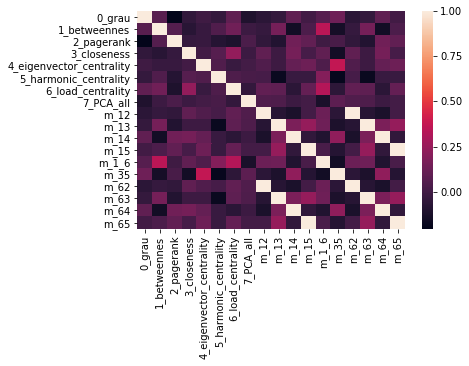

In [38]:
sns.heatmap(df.corr())

In [57]:
j, k = (list(x) for x in zip(*sorted(zip(pca_values, vindex), reverse=True)))


In [61]:
for n,m in enumerate(k):
    if m == 5:
        print n,m


150 5
